In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('city.csv', index_col='city')
df

,総人口,人口増加率（2015～20年）,65歳以上人口比率,可住地面積1km^2当たり人口密度,一人当たり歳出額,小学校1校当たり児童数,中学校1校当たり生徒数,完全失業率,第１次産業就業率,第２次産業就業率,第３次産業就業率,人口10万人当たり公民館＋図書館数,人口10万人当たり大型小売店数
city,,,,,,,,,,,,,
室蘭市（北海道）,82383.0,-6.979134,36.815848,1898.225806,549.683551,331.200000,212.500000,4.004339,0.932830,26.358218,71.085135,1.213843,13.352269
夕張市（北海道）,7334.0,-17.064345,52.195255,65.687416,1464.728116,187.000000,100.000000,6.978085,16.790924,21.977310,60.940032,13.635124,0.000000
岩見沢市（北海道）,79306.0,-6.145635,36.415908,249.147058,601.711283,248.785714,206.888889,3.915374,7.915994,17.664855,71.461301,2.521877,12.609386
網走市（北海道）,35759.0,-8.490928,31.485780,165.596925,641.396823,181.222222,136.833333,2.919929,13.125635,15.278359,68.456617,2.796499,13.982494
留萌市（北海道）,20114.0,-9.482022,36.914587,386.658977,666.820523,157.600000,225.000000,4.000353,3.280908,19.747943,76.492032,9.943323,14.914985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
久米島町（沖縄県）,7192.0,-7.259832,29.824805,180.205462,1111.728170,76.833333,108.000000,4.335398,24.208999,14.165457,60.058055,13.904338,0.000000
八重瀬町（沖縄県）,30941.0,6.450836,22.381306,1239.623397,451.267800,629.500000,485.500000,4.875457,7.631891,15.960285,74.029342,3.231958,9.695873
多良間村（沖縄県）,1058.0,-11.390285,30.529301,66.582756,2425.789225,84.000000,29.000000,3.205128,42.288557,13.930348,43.283582,94.517958,0.000000


In [3]:
C = df.index.values
C

array(['室蘭市（北海道）', '夕張市（北海道）', '岩見沢市（北海道）', ..., '多良間村（沖縄県）', '竹富町（沖縄県）',
       '与那国町（沖縄県）'], dtype=object)

In [4]:
F = df.columns.values
F

array(['総人口', '人口増加率（2015～20年）', '65歳以上人口比率', '可住地面積1km^2当たり人口密度',
       '一人当たり歳出額', '小学校1校当たり児童数', '中学校1校当たり生徒数', '完全失業率', '第１次産業就業率',
       '第２次産業就業率', '第３次産業就業率', '人口10万人当たり公民館＋図書館数', '人口10万人当たり大型小売店数'],
      dtype=object)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
val_sc = sc.fit_transform(df)
val_sc

array([[ 2.35957047, -0.16371757,  0.07951974, ...,  1.10862755,
        -0.40187352,  0.51946321],
       [-0.7486389 , -1.28515121,  2.10863468, ..., -0.03614339,
        -0.32247914, -1.02099848],
       [ 2.23213426, -0.07103595,  0.02675281, ...,  1.15107403,
        -0.39351282,  0.43375624],
       ...,
       [-1.00856405, -0.65421927, -0.74990932, ..., -2.02849297,
         0.19450795, -1.02099848],
       [-0.88912107,  0.45658109, -1.74885963, ...,  1.55912141,
        -0.40963216, -1.02099848],
       [-0.98296912, -0.39524728, -1.94388592, ...,  1.32309607,
        -0.02825971, -1.02099848]])

In [6]:
val_sc.shape

(1451, 13)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
val_PCA = pca.fit_transform(val_sc)

In [8]:
df_PCA = pd.DataFrame(pca.components_, index=F, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
総人口,0.326778,0.197469,-0.336540,0.308632,-0.297696,0.380250,0.380149,0.083421,-0.334777,0.169588,0.191997,-0.159841,0.240367
人口増加率（2015～20年）,-0.007341,0.100902,-0.007647,0.261858,0.253802,0.011999,-0.086860,-0.074439,-0.032426,-0.654918,0.638751,0.074103,-0.005314
65歳以上人口比率,0.022121,0.355809,-0.349530,0.091384,0.207397,0.152505,0.135234,-0.669591,0.286955,-0.048792,-0.295705,0.143563,-0.129231
可住地面積1km^2当たり人口密度,-0.044997,0.111388,0.064158,0.099786,0.180079,-0.017085,-0.011207,0.034925,-0.410092,0.360433,0.132860,0.748944,-0.246520
一人当たり歳出額,-0.215360,0.717776,-0.073454,-0.194015,0.233059,-0.111150,-0.118799,0.261732,-0.154574,0.137505,0.063505,-0.392292,-0.212992


In [9]:
ratio = pca.explained_variance_ratio_
cum_ratio = []
s = 0
for i in (ratio):
    s += i
    cum_ratio.append(s)
df_cum_ratio = pd.DataFrame(cum_ratio, index = [f'PC{i+1}' for i in range(pca.n_components_)], columns=['累積寄与率']).T
df_cum_ratio

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
累積寄与率,0.383193,0.497661,0.603717,0.679308,0.743526,0.802991,0.854725,0.895348,0.930903,0.963334,0.984032,0.999358,1.0


In [10]:
df_PCA = df_PCA.append(df_cum_ratio)
df_PCA.tail()

C:\Users\Takumu\AppData\Local\Temp\ipykernel_4124\3576223067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_PCA = df_PCA.append(df_cum_ratio)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
第２次産業就業率,-0.249665,0.239388,0.524846,0.621028,-0.195484,-0.034539,-0.213929,-0.208786,-0.014979,0.127542,-0.120558,-0.100669,0.222030
第３次産業就業率,0.156924,0.073246,0.645651,-0.231989,0.326127,0.284082,0.550008,-0.063825,0.014460,-0.018467,0.015419,-0.069250,0.009949
人口10万人当たり公民館＋図書館数,0.094252,-0.005306,0.081746,-0.199473,0.013520,0.758211,-0.606517,-0.023285,-0.016971,0.026108,0.005017,0.005770,-0.010830
人口10万人当たり大型小売店数,-0.011821,-0.006168,0.003948,-0.008488,0.020141,0.005605,-0.001257,0.020929,-0.631959,-0.523524,-0.570407,0.000187,-0.006697
累積寄与率,0.383193,0.497661,0.603717,0.679308,0.743526,0.802991,0.854725,0.895348,0.930903,0.963334,0.984032,0.999358,1.000000


In [11]:
def color_background1(val):
    if val >= 0.2:
        color = 'red'
    elif val <= -0.2:
        color = 'blue'
    elif (val >= 0.15) & (val < 0.2):
        color = 'salmon'
    elif (val <= -0.15) & (val > -0.2):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

In [12]:
my_df = df_PCA.iloc[:, :4]
my_df.style.applymap(color_background1) 

,PC1,PC2,PC3,PC4
総人口,0.326778,0.197469,-0.336540,0.308632
人口増加率（2015～20年）,-0.007341,0.100902,-0.007647,0.261858
65歳以上人口比率,0.022121,0.355809,-0.349530,0.091384
可住地面積1km^2当たり人口密度,-0.044997,0.111388,0.064158,0.099786
一人当たり歳出額,-0.215360,0.717776,-0.073454,-0.194015
小学校1校当たり児童数,0.000065,0.238070,-0.026762,-0.380258
中学校1校当たり生徒数,-0.194313,0.280652,-0.007454,0.082243
完全失業率,0.760473,0.298115,0.212611,-0.066518
第１次産業就業率,0.363609,-0.097786,-0.099983,0.380901
第２次産業就業率,-0.249665,0.239388,0.524846,0.621028


In [13]:
pd.options.display.float_format = '{:.4f}'.format
pca_score = pd.DataFrame(val_PCA, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)
df_score = pca_score.iloc[:, :4]
df_score

,PC1,PC2,PC3,PC4
室蘭市（北海道）,2.2926,0.6752,-1.0772,0.1258
夕張市（北海道）,-2.1552,-0.0390,-3.0664,-0.0744
岩見沢市（北海道）,1.1793,1.0548,-0.9225,-0.6162
網走市（北海道）,0.0539,1.0993,-0.1212,-1.0223
留萌市（北海道）,0.4674,1.2790,-1.5707,-0.1739
...,...,...,...,...
久米島町（沖縄県）,-1.6491,0.6841,-0.0131,-0.9606
八重瀬町（沖縄県）,3.4031,1.5260,0.2302,-0.4208
多良間村（沖縄県）,-3.7835,0.0256,1.9493,-1.2940
竹富町（沖縄県）,-1.6467,2.8923,1.3761,-0.8147


In [14]:
my_score = df_score.values
my_score.shape

(1451, 4)

In [15]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(my_score)
labels

array([3, 7, 3, ..., 1, 1, 1], dtype=int64)

In [16]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([350, 161, 354, 159,  21, 156, 159,  91], dtype=int64))

In [17]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


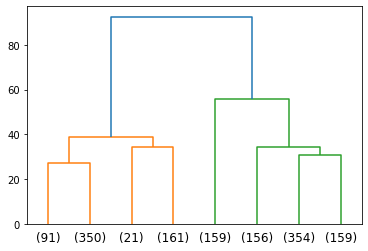

In [18]:
model = AgglomerativeClustering(affinity='euclidean', 
                                linkage='ward', 
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(my_score)
plot_dendrogram(model, truncate_mode='lastp', p=8)

In [19]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []

for i in range(1451):
    if labels[i] == 0:
        group1.append(C[i])
    elif labels[i] == 1:
        group2.append(C[i])
    elif labels[i] == 2:
        group3.append(C[i])
    elif labels[i] == 3:
        group4.append(C[i])
    elif labels[i] == 4:
        group5.append(C[i])
    elif labels[i] == 5:
        group6.append(C[i])
    elif labels[i] == 6:
        group7.append(C[i])
    else:
        group8.append(C[i])

In [20]:
df_group1 = df_score.loc[group1, :]
df_group1

,PC1,PC2,PC3,PC4
網走市（北海道）,0.0539,1.0993,-0.1212,-1.0223
美唄市（北海道）,-0.8829,0.3307,-0.7643,-0.3464
紋別市（北海道）,-0.5973,0.2920,-0.2703,-0.0849
士別市（北海道）,-1.4034,0.6623,0.1315,-0.5829
根室市（北海道）,-0.9555,0.0884,0.4962,-1.1250
...,...,...,...,...
肝付町（鹿児島県）,-1.1669,0.0732,-1.0992,-0.4786
喜界町（鹿児島県）,-0.8023,1.0238,-0.1836,-1.5055
今帰仁村（沖縄県）,-0.5942,0.7185,-0.9218,-0.8045
宜野座村（沖縄県）,-0.3248,1.6905,0.9158,0.2203


In [21]:
df_group2 = df_score.loc[group2, :]
df_group2

,PC1,PC2,PC3,PC4
新篠津村（北海道）,-3.3297,0.2829,2.0728,-2.3423
今金町（北海道）,-2.5476,0.6749,0.7356,-1.2228
せたな町（北海道）,-2.8724,0.6484,-0.4297,-0.9061
島牧村（北海道）,-2.8961,1.5484,0.3274,-0.6924
寿都町（北海道）,-2.1245,0.8807,-0.0753,0.2844
...,...,...,...,...
北大東村（沖縄県）,-3.0098,0.0070,3.6881,0.6189
伊平屋村（沖縄県）,-3.1898,1.1969,0.9193,0.2179
多良間村（沖縄県）,-3.7835,0.0256,1.9493,-1.2940
竹富町（沖縄県）,-1.6467,2.8923,1.3761,-0.8147


In [22]:
df_group3 = df_score.loc[group3, :]
df_group3

,PC1,PC2,PC3,PC4
砂川市（北海道）,0.1796,0.6151,-1.8153,-0.1411
七飯町（北海道）,1.4297,0.4415,-3.3861,-0.3026
岩内町（北海道）,0.2863,-0.3251,-1.1943,0.3160
黒石市（青森県）,1.1083,-0.4015,-0.7498,-0.7359
五所川原市（青森県）,0.5037,0.3978,-1.4947,-0.7322
...,...,...,...,...
薩摩川内市（鹿児島県）,1.5654,-0.2518,-0.5991,-0.0039
日置市（鹿児島県）,0.6634,0.4369,-0.6233,-0.0697
いちき串木野市（鹿児島県）,0.1448,-0.0537,-1.4073,0.2381
南さつま市（鹿児島県）,-0.2383,0.6854,-1.2270,-0.0051


In [23]:
df_group4 = df_score.loc[group4, :]
df_group4

,PC1,PC2,PC3,PC4
室蘭市（北海道）,2.2926,0.6752,-1.0772,0.1258
岩見沢市（北海道）,1.1793,1.0548,-0.9225,-0.6162
留萌市（北海道）,0.4674,1.2790,-1.5707,-0.1739
稚内市（北海道）,0.0725,0.6300,-1.1459,-0.4485
名寄市（北海道）,0.0975,2.1880,0.2618,-0.6778
...,...,...,...,...
宮古島市（沖縄県）,0.6462,1.3204,0.7918,-0.9985
南城市（沖縄県）,2.0974,1.4426,-0.3733,-0.2728
本部町（沖縄県）,0.0238,1.5437,-2.0207,-0.2502
恩納村（沖縄県）,0.9569,2.2958,-1.7736,-0.6892


In [24]:
df_group5 = df_score.loc[group5, :]
df_group5

,PC1,PC2,PC3,PC4
七ヶ宿町（宮城県）,-4.0430,0.7171,0.9074,3.0659
飯豊町（山形県）,-2.5962,-1.2579,1.5408,4.6782
青ヶ島村（東京都）,-3.3241,2.5603,3.0878,4.4571
粟島浦村（新潟県）,-4.8275,3.3392,3.1571,2.8885
早川町（山梨県）,-3.0546,-0.3484,1.8861,5.3747
小菅村（山梨県）,-3.8522,2.0186,1.9492,7.4023
丹波山村（山梨県）,-3.4522,2.6666,-1.2404,5.1648
南相木村（長野県）,-5.2119,1.3226,3.3928,6.2433
北相木村（長野県）,-4.4350,0.1530,2.4941,5.3696
阿南町（長野県）,-3.2110,0.0524,0.9492,4.2450


In [25]:
df_group6 = df_score.loc[group6, :]
df_group6

,PC1,PC2,PC3,PC4
おいらせ町（青森県）,1.4384,-0.3129,-0.0649,-0.4238
花巻市（岩手県）,1.5217,-0.4475,-0.0524,-0.7767
北上市（岩手県）,2.4007,-1.4724,0.7029,-0.0521
大河原町（宮城県）,2.5835,-0.3902,-0.4493,0.1436
大和町（宮城県）,1.8800,-0.8940,0.6395,0.9228
...,...,...,...,...
波佐見町（長崎県）,1.3964,-0.8534,0.3874,0.1271
大津町（熊本県）,2.7132,-1.3835,1.3637,0.1214
菊陽町（熊本県）,4.1957,-0.4904,1.5478,-0.2255
中津市（大分県）,1.8157,-0.8842,0.1592,0.3759


In [26]:
df_group7 = df_score.loc[group7, :]
df_group7

,PC1,PC2,PC3,PC4
千歳市（北海道）,3.0962,1.4965,0.2528,-0.5836
恵庭市（北海道）,3.1768,1.0177,-0.2961,-0.3971
北広島市（北海道）,2.0767,1.7262,-0.9256,-0.4307
塩竈市（宮城県）,2.5822,1.3429,-1.1021,0.3036
名取市（宮城県）,4.2373,1.0284,0.4441,-0.4655
...,...,...,...,...
中城村（沖縄県）,3.5206,1.8570,1.0828,-0.0252
西原町（沖縄県）,4.1256,1.9640,0.1981,-0.2103
与那原町（沖縄県）,5.3632,2.8145,0.8724,-0.0617
南風原町（沖縄県）,5.6098,2.7031,0.8555,-0.4745


In [27]:
df_group8 = df_score.loc[group8, :]
df_group8

,PC1,PC2,PC3,PC4
夕張市（北海道）,-2.1552,-0.0390,-3.0664,-0.0744
芦別市（北海道）,-1.1103,-0.4418,-2.2643,-0.0429
赤平市（北海道）,-0.8406,0.2046,-2.4320,0.3626
三笠市（北海道）,-1.1067,0.8628,-3.7075,0.1611
歌志内市（北海道）,-1.9055,0.6622,-3.3985,0.9370
...,...,...,...,...
大和村（鹿児島県）,-2.7419,1.5245,-0.4655,0.5316
国頭村（沖縄県）,-1.7703,1.2639,-2.1875,0.7498
大宜味村（沖縄県）,-1.7654,0.8439,-0.9982,-0.3689
粟国村（沖縄県）,-2.1745,1.9125,-2.0578,1.2415


In [28]:
def color_background2(val):
    if val >= 1.7:
        color = 'red'
    elif val <= -1.7:
        color = 'blue'
    elif (val >= 1.2) & (val < 1.7):
        color = 'salmon'
    elif (val <= -1.2) & (val > -1.7):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

In [29]:
pd.DataFrame([df_group1.mean(), df_group2.mean(), df_group3.mean(), df_group4.mean(), df_group5.mean(), df_group6.mean(),
            df_group7.mean(), df_group8.mean()], 
            index=['グループ1', 'グループ2', 'グループ3', 'グループ4', 'グループ5', 'グループ6', 'グループ7', 'グループ8'
            ]).style.applymap(color_background2) 

,PC1,PC2,PC3,PC4
グループ1,-1.449931,-0.280306,0.051485,-0.220482
グループ2,-2.838432,0.919806,1.223688,-0.695212
グループ3,0.382648,-0.897503,-0.415645,0.120414
グループ4,0.800614,1.086888,-0.712554,-0.288248
グループ5,-4.156044,1.392431,1.620652,4.762364
グループ6,2.275639,-1.142605,0.521326,0.184273
グループ7,3.818072,1.238500,0.618224,0.071921
グループ8,-1.902063,0.516517,-1.848978,0.572651
